## <font style = "color:rgb(139,0,0)">SUPERVISED LEARNNG PROJECT</font>

### <font style = "color:rgb(139,0,0)">Data Description</font>

The file Bank_Personal_Loan_Modelling.csv contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with
the bank (mortgage, securities account, etc.), and the customer response to the
last personal loan campaign (Personal Loan). Among these 5000 customers,
only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.

### <font style = "color:rgb(139,0,0)">Domain</font>

Banking

### <font style = "color:rgb(139,0,0)">Context</font>

This case is about a bank (Thera Bank) whose management wants to explore
ways of converting its liability customers to personal loan customers (while
retaining them as depositors). A campaign that the bank ran last year for liability
customers showed a healthy conversion rate of over 9% success. This has
encouraged the retail marketing department to devise campaigns with better
target marketing to increase the success ratio with minimal budget.

### <font style = "color:rgb(139,0,0)">Attribute Information</font>

- **`ID`** - Customer ID
- **`Age`** - Customer's age in completed years
- **`Experience`** - years of professional experience
- **`Income`** - Annual income of the customer (in "Dollars")
- **`ZIP code`** - Home Address ZIP code
- **`Family`** - Family size of the customer
- **`CCAvg`** - Avg. spending on credit cards per month (in "Dollars")
- **`Education`** - Education Level.
                       1. Undergrad
                       2. Graduate
                       3. Advanced/Professional
- **`Mortgage`** - Value of house mortgage if any (in "Dollars")
- **`Personal Loan`** - Did this customer accept the personal loan offered in
the last campaign?
- **`Securities Account`** - Does the customer have a securities account with
the bank?
- **`CD Account`** - Does the customer have a certificate of deposit (CD)
 account with the bank?
- **`Online`** - Does the customer use internet banking facilities?
- **`Credit card`** - Does the customer use a credit card issued by
 Thera Bank?
 
### <font style = "color:rgb(139,0,0)">Learning Outcomes</font>
- **`Exploratory Data Analysis`** 
- **`Preparing the data to train a model`** 
- **`Training and making predictions using a classical model`** 
- **`Model evaluation`**  

### <font style = "color:rgb(139,0,0)">Objective</font>
- **`The classification goal is to predict the likelihood of a liability customer buying
     personal loans.`**

### <font style = "color:rgb(139,0,0)">Steps and tasks :</font>
1. Read the column description and ensure you understand each attribute
well
2. Study the data distribution in each attribute, share your findings
(15 marks)
3. Get the target column distribution. Your comments (5 marks)
4. Split the data into training and test set in the ratio of 70:30 respectively
(5 marks)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to
predict the likelihood of a customer buying personal loans (15 marks)
6. Print the confusion matrix for all the above models (5 marks)
7. Give your reasoning on which is the best model in this case and why it
performs better? (5 marks)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
# Here Supressing warnings to prevent a user from seeing warnings that are only of interest to the developer.
#import warnings
#warnings.filterwarnings("ignore")

In [3]:
bank_data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [4]:
bank_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


WE CAN UNDERSTAND ABOUT EACH OF THE COLUMN BY REFERRING TO ATTRIBUTE INFORMATION.

FURTHERMORE HERE IS THE KEY-FINDINGS FROM THE DATASET :-
- **`A`** - Since every user is going to have a separate ID, it's not going to add any significant value to the model, so we can remove that.
- **`B`** - Age can provide us information regarding the likelihood of a user accepting the personal loan based on the age group he/she lies in.
- **`C`** - We can get similar information based on Experience, Income, etc.
- **`D`** - ZIP Code can give information regarding the effect of the personal loan on the likelihood of a person opting for personal loan.
- **`E`** -  As Education has 3 levels, it serves as a categorical variable and provides information regarding the education of the user.
- **`F`** - Personal Loan, Securities Account, CD Account, Online and CreditCard are also categorical variables with only 2                          levels and provide the relevant user attributes.
- **`G`** - All the columns except ID and Personal Loan can be used as independent variables.
- **`H`** - The target variable/column is Personal Loan.

In [5]:
bank_data.shape

(5000, 14)

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


WE CAN SEE HERE THAT WE DO NOT HAVE ANY NULL VALUES HERE SO WE ARE GOOD TO GO.<br>
ALSO ALL DATA TYPES ARE CORRECT SO WE DO NOT HAVE TO CHANGE ANY DATA TYPE.

In [7]:
bank_data.describe(percentiles = [0.10,0.25,0.50,0.75,0.90]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
ID,5000.0,2500.500000,1443.520003,1.0,500.9,1250.75,2500.5,3750.25,4500.1,5000.0
Age,5000.0,45.338400,11.463166,23.0,30.0,35.00,45.0,55.00,61.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,4.0,10.00,20.0,30.00,36.0,43.0
Income,5000.0,73.774200,46.033729,8.0,22.0,39.00,64.0,98.00,145.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,90275.0,91911.00,93437.0,94608.00,95138.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,1.00,2.0,3.00,4.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.3,0.70,1.5,2.50,4.3,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,1.00,2.0,3.00,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.00,0.0,101.00,200.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.00,0.0,0.00,0.0,1.0


By referring to the distribution above we can infer many things here :-<br>
1 - Income variable has some potential outliers on the higher end and the lower end. This can be seen because of the sudden jump in min and 10% percentile. &nbsp;&nbsp; Similar jump is present in 75% and 90% and between 90% and max.<br>
2 - ZIP Code is being a nominal variable here, so the description doesn't convey any meaning.<br>
3 - CCAvg has some potential outliers on the higher end. This can be seen because of a sudden jump between 90% and max value.<br>
4 - Mortgage description shows that at least 50% entries don't have any mortgage. There's also a potential outlier on the higher end. This can be seen because of the sudden jump in 90% and max value.

In [8]:
bank_data.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

The less number of unique elements for Family, Education, Personal Loan, Securities Account, CD Account, Online and CreditCard variables prove that they are categorical variables.

## Now let's start carrying out Unilateral Analysis on the data.

In [9]:
def unilateralAnalysis(variable, categorical=False):
    # For categorical attributes, we plot a countplot.
    if categorical:
        sns.countplot(bank_data[variable])
        plt.show()
    else:
        plt.subplot(2,1,1)
        # Distribution Plot.
        sns.distplot(bank_data[variable])
        plt.subplot(2,1,2)
        # Boxplot.
        sns.boxplot(bank_data[variable])
        plt.show()
        print("Mean: {:.2f}".format(bank_data[variable].mean()))

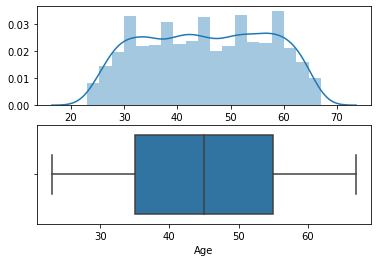

Mean: 45.34


In [10]:
unilateralAnalysis("Age")

The **Age** attribute is following a normal distribution approximately. The **Mean** and **Median** are similar.

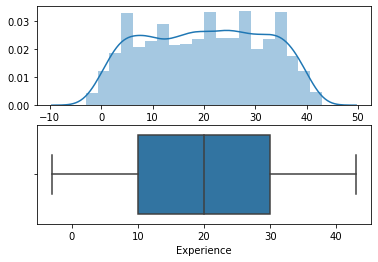

Mean: 20.10


In [11]:
unilateralAnalysis("Experience")

The **Experience** attribute is also following a normal distribution approximately. Also we can see that there are some entries with negative Experience that has to be removed.

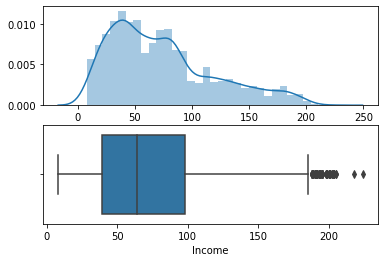

Mean: 73.77


In [12]:
unilateralAnalysis("Income")

As we have noticed before, **Income** attribute has some outliers which need to be removed. Also, it can be seen that Income is positively skewed i.e. **Mean** is greater than the **Median**.

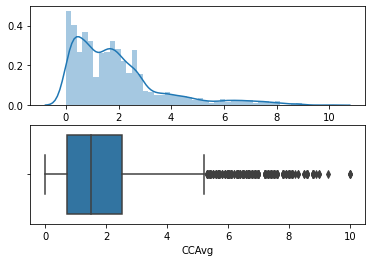

Mean: 1.94


In [13]:
unilateralAnalysis("CCAvg")

Here we can see that **CCAvg** attribute is also positively skewed and has some outliers that can be removed.

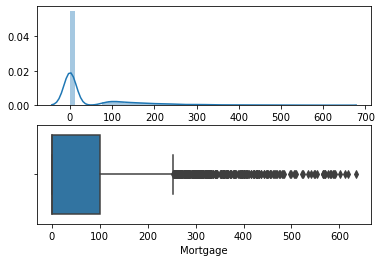

Mean: 56.50


In [14]:
unilateralAnalysis("Mortgage")

As we can infer from the above plots that majority of customers don't have a mortgage and the maximum mortgage is very high and can be removed.

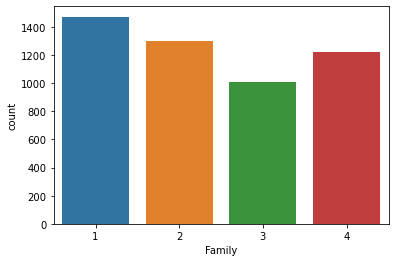

In [15]:
unilateralAnalysis("Family",True)

**Family** attribute is evenly distributed.

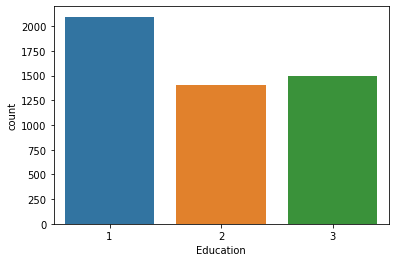

In [16]:
unilateralAnalysis("Education",True)


The **Education** attribute is evenly distributed to a large extent. Moreover, most customers hold an undergraduate level of education.

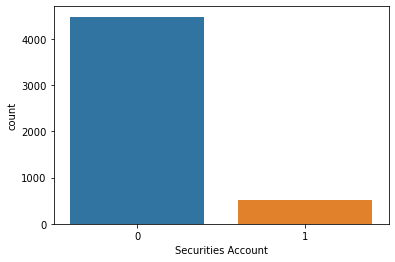

In [17]:
unilateralAnalysis("Securities Account",True)

The **Securities Account** attribute is unevenly distributed. Moreover, most people don't have a **Securities Account**.

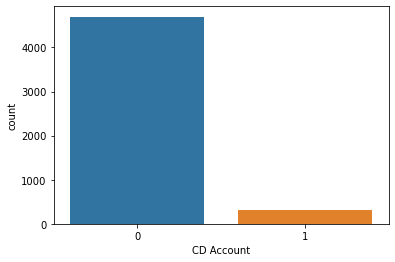

In [18]:
unilateralAnalysis("CD Account",True)

The **CD Account** attribute is also unevenly distributed. Moreover, most people don't have a **CD Account**.

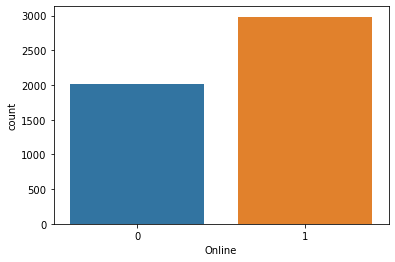

In [19]:
unilateralAnalysis("Online",True)

The **Online** attribute is slight unevenly distributed. 

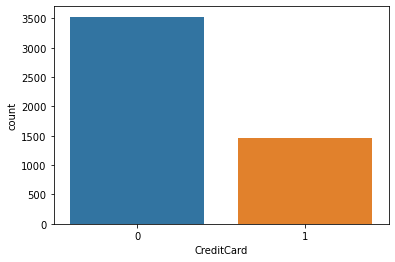

In [20]:
unilateralAnalysis("CreditCard",True)

The **CreditCard** attribute is also slight unevenly distributed.

## As unilateral analysis is done, let's now do some data cleaning based on our findings to get the best out of the project.

Let's start by treating the negative experience entries.

In [21]:
sum(bank_data["Experience"]<0)

52

In [22]:
sum(bank_data["Experience"]<0)/len(bank_data.index) * 100

1.04


This means that **1.04% entries** have negative Experience.<br> Now there are 2 main ways of treating this data :-

 **1** - We can remove these entries. Since it's just 1.04%, we won't be losing any major amount of data.<br>
 **2** - We can replace these experience values with a different value.
Before we make the decision, let's have a look at the experience values.

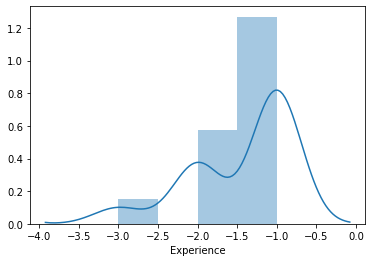

In [23]:
sns.distplot(bank_data[bank_data["Experience"] < 0]["Experience"])
plt.show()

In [24]:
bank_data[bank_data["Experience"]<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [25]:
bank_data["Experience"].median()

20.0

Instead of removing the data, it can be assumed that this was an error in manual entry of data because all the 52 entries have a stable income and a good education.<br> If we replace these values with the median entry of 20 years, it will create a huge difference in the magnitude of experience for these values.<br> That's why, I will replace these values with their magnitudes assuming that there was some error in entry.<br> Since it's just 5000 entries of data, I don't want to lose any data unless it's absolutely necessary.

In [26]:
bank_data["Experience"] = bank_data["Experience"].apply(lambda x: abs(x))

In [27]:
sum(bank_data["Experience"] < 0)

0

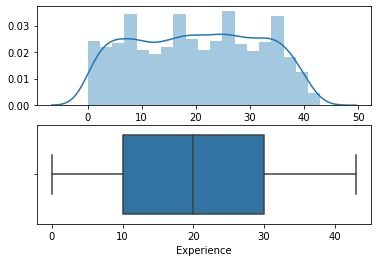

Mean: 20.13


In [28]:
unilateralAnalysis("Experience")

In [29]:
bank_data["Experience"].median()

20.0

We can see that there is no significant change in **Mean**, **Median** and **Distribution of Experience** so we can safely continue using these values for model building.

## Now that we have seen the distribution of each attribute, let's continue to understand the affect they have on the target variable and their relationship with each other.

In [30]:
def furtherAnalysisCategorical(variable, countplot=False, variable2 = None):
    if countplot:
        sns.countplot(x=variable,data=bank_data,hue='Personal Loan')
        plt.show()
    else:
        # Boxplot
        sns.boxplot(x=variable,y=variable2,hue='Personal Loan',data=bank_data)
        plt.show()

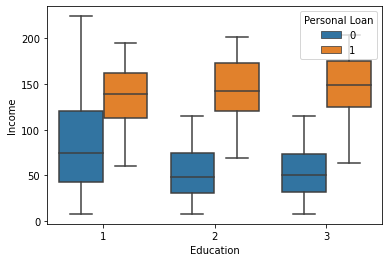

In [31]:
furtherAnalysisCategorical("Education",False,"Income")

As expected we can see that people with higher income tend to go for **Personal loan**.<br> The difference is larger as the education level increases from 1 to 3.<br> Also we can see that the income levels for the people who opted for the loan have a similar income spread irrespective of their education level.

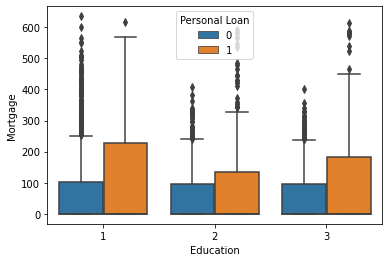

In [32]:
furtherAnalysisCategorical("Education",False,"Mortgage")

As expected, people with higher mortgage tend to go for a personal loan.<br> The reason can be so that they can pay back the mortgage in time.

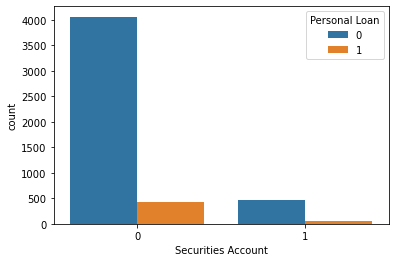

In [33]:
furtherAnalysisCategorical("Securities Account",True)

As Compared to customers having a personal loan, more of those who don't have a personal loan have a securities account.<br> But, the customers having a securities account is very low irrespective of whether they have taken a personal loan or not.

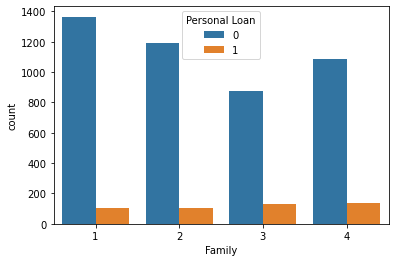

In [34]:
furtherAnalysisCategorical("Family",True)

We can see that number of family members doesn't seem to have any significant affect on the number of customers who opted for personal loan.<br> But, if we focus on the ratio of people who didn't opt for the loan and those who opted for the loan, the customers with family size 3 are most likely to opt for the loan.

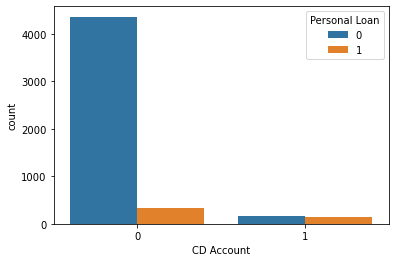

In [35]:
furtherAnalysisCategorical("CD Account",True)

Here we see that almost all the customers who have a **CD Account** have a personal loan whereas if a customer doesn't have a **CD Account**, the likelihood of the customer having a personal loan is very low.

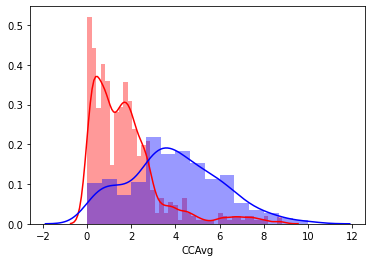

In [36]:
sns.distplot( bank_data[bank_data["Personal Loan"] == 0]['CCAvg'], color='r')
sns.distplot( bank_data[bank_data["Personal Loan"] == 1]['CCAvg'], color='b')
plt.show()

From above we see that customers with higher credit card average have a higher likelihood of having a personal loan.<br> This can also be understood because a credit card is similar to a personal loan (one with a very short tenure) to a large extent.<br> So if a customer is spending higher amount of money with a credit card, they have a higher chance to opt for a personal loan and pay the amount back later.

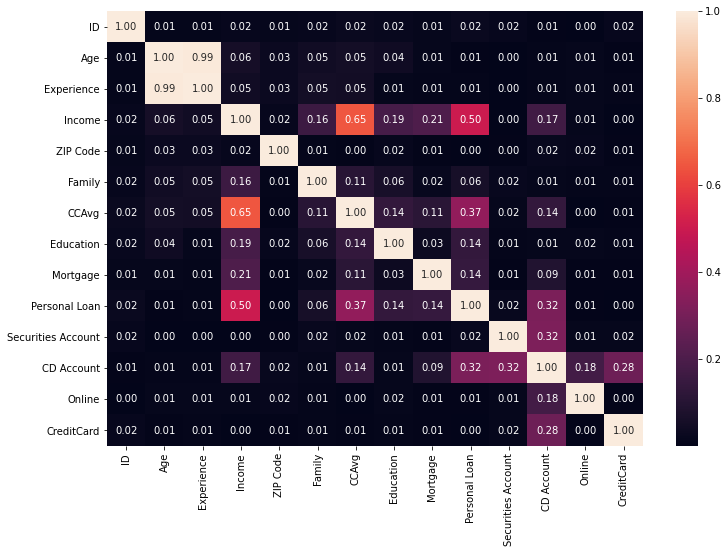

In [37]:
# Here we plot Heatmap of ABSOLUTE values of correlation.
plt.figure(figsize=(12,8))
sns.heatmap(np.abs(bank_data.corr()), annot=True, fmt=".2f")
plt.show()

From the above heatmap of absolute values of correlation, we can see that **Income** and **CCAvg** are moderately correlated (corr = 0.65).<br>Mpreover **Age** and **Experience** are highly correlated.

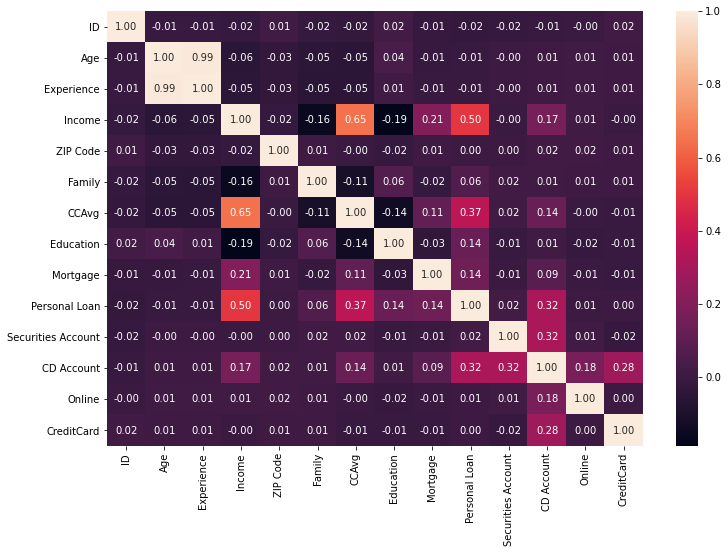

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(bank_data.corr(), annot=True, fmt=".2f")
plt.show()

From the above heatmap, we can see that all **Age**, **Experience** and **Income**, **CCAvg** have a positive correlation.
<br>We can drop **Experience** attribute.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# We need a 70:30 split.
# Specifying a random state so that the results can be generated again.
train, test = train_test_split(bank_data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=42)

In [41]:
X_train = train.drop("Personal Loan",axis=1)
y_train = train["Personal Loan"]
X_test = test.drop("Personal Loan",axis=1)
y_test = test["Personal Loan"]

In [42]:
X_train.shape, X_test.shape

((3500, 11), (1500, 11))

In [43]:
y_train.shape, y_test.shape

((3500,), (1500,))

We should also normalize the values.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(X_train, y_train)

LogisticRegression()

In [51]:
score = lr.score(X_test, y_test)

In [52]:
score

0.952

We obtained an accuracy of 95.2% on test set.

In [53]:
score = lr.score(X_train, y_train)
score

0.9528571428571428

And a similar accuracy on the train set. So we know that the model didn't overfit the data.

In [54]:
confusion_matrix(y_test, lr.predict(X_test))

array([[1325,   18],
       [  54,  103]], dtype=int64)

In [55]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.66      0.74       157

    accuracy                           0.95      1500
   macro avg       0.91      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500



In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [60]:
y_pred = knn.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

0.9546666666666667

In [61]:
y_pred = knn.predict(X_train)
acc = accuracy_score(y_pred, y_train)
acc

0.9682857142857143

We obtained 96.83% accuracy on train data and 95.47% accuracy on test data using kNN classifier with n=5.

Now let's use the Elbow Method to obtain the n_neighbors value.

In [62]:
test_accuracies = []
train_accuracies = []
# little time taking.
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    acc = accuracy_score(pred_i, y_test)
    test_accuracies.append(acc)
    pred_i = knn.predict(X_train)
    acc = accuracy_score(pred_i, y_train)
    train_accuracies.append(acc)

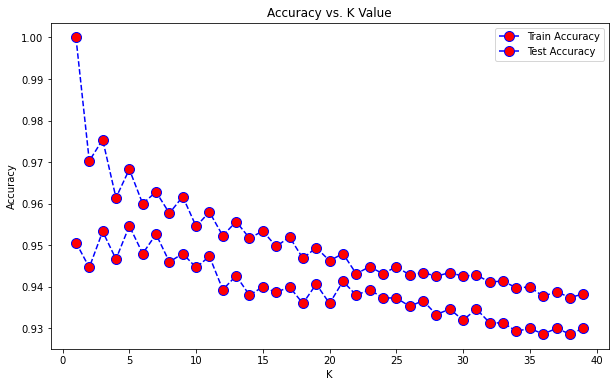

In [63]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),train_accuracies,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label="Train Accuracy")
plt.plot(range(1,40),test_accuracies,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label="Test Accuracy")
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As we can see from the above graph that we can continue using the initial choice of n_neighbors = 5.

In [64]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
confusion_matrix(y_test, knn.predict(X_test))

array([[1337,    6],
       [  62,   95]], dtype=int64)

In [66]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1343
           1       0.94      0.61      0.74       157

    accuracy                           0.95      1500
   macro avg       0.95      0.80      0.86      1500
weighted avg       0.95      0.95      0.95      1500



In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [69]:
y_pred = nb.predict(X_test)

In [70]:
nb.score(y_test.values.reshape(-1,1), y_pred.reshape(-1,1))

0.8726666666666667

In [71]:
y_pred = nb.predict(X_train)
nb.score(y_train.values.reshape(-1,1), y_pred.reshape(-1,1))

0.8682857142857143

We obtained an accuracy of 86.83% on training set and 87.27% on testing set.

In [72]:
confusion_matrix(y_test, nb.predict(X_test))

array([[1245,   98],
       [  64,   93]], dtype=int64)

In [73]:
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.49      0.59      0.53       157

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500



## For final model comparison, we should use Cross Validation score.

In [74]:
from sklearn.model_selection import KFold, cross_val_score

In [75]:
models = [lr, knn, nb]
model_names = ["Logistic Regression", "K-NN Classifier", "Naive Bayes"]
results = []
kfold = KFold(n_splits = 10, random_state=42)

R:\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [76]:
X = bank_data.drop(["ID","Experience","Personal Loan"],axis=1)

In [77]:
y = bank_data["Personal Loan"]

In [78]:
for model,model_name in zip(models, model_names):
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring = "accuracy")
    results.append(cv_results)
    print("Model: {}, Mean Accuracy: {}, Std: {}".format(model_name, cv_results.mean(), cv_results.std()))

R:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
R:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Model: Logistic Regression, Mean Accuracy: 0.9118, Std: 0.015683111936092262
Model: K-NN Classifier, Mean Accuracy: 0.8986000000000001, Std: 0.008901685233707162
Model: Naive Bayes, Mean Accuracy: 0.8855999999999999, Std: 0.010384603988597745


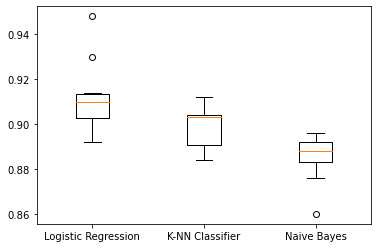

In [79]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

As we can see from the box plot above, **Logistic Regression** is the best model followed by **K-NN Classifier** and finally the **Naive Bayes model**.

**Logistic Regression** works best when there is a **linearity** in the model and the **classes** are **cleanly distributed**.<br> As we saw in the Steps 1 and Steps 2, the target variable's dependence on the other variables can be simply explained based on the values of the independent variables.<br> In such a case, the **Decision tree classifier (CART)** will also give a very good result which can be easily verified as shown below.

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [82]:
dt.score(X_test , y_test)

0.9826666666666667

In [83]:
dt.score(X_train, y_train)

0.9785714285714285

We can see here that the **Decision Tree classifier** was able to obtain an accuracy of 98.27% on testing set and 97.86% on training set.